# AI in Biology Final Project 
### Anna Mattessich and Keerthi Mula

## Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import Callback

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc


## Import Data 
Data selected from https://archive.ics.uci.edu/ (UC Irvine Machine Learning Repository)

Data about mushrooms and mushroom identification. 

Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

In [2]:
# Data saves in folder titled Mushroom Data, but taking data directly from website
# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Define column names based on the description provided
column_names = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
                'veil-type', 'veil-color', 'ring-number', 'ring-type',
                'spore-print-color', 'population', 'habitat']

# Load the dataset into a DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Variable Meaning
**poisonous:**                poisonous=p,edible=e

**cap-shape:**                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:**              fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:**                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

**bruises?:**                 bruises=t,no=f

**odor:**                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

**gill-attachment:**          attached=a,descending=d,free=f,notched=n

**gill-spacing:**             close=c,crowded=w,distant=d

**gill-size:**                broad=b,narrow=n

**gill-color:**               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

**stalk-shape:**              enlarging=e,tapering=t

**stalk-root:**               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:**   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:**   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

**veil-type:**                partial=p,universal=u

**veil-color:**               brown=n,orange=o,white=w,yellow=y

**ring-number:**              none=n,one=o,two=t

**ring-type:**                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:**        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

**population:**               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

**habitat:**                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Introduction
We are trying to answer the question: Can we determine if a mushroom is poisonous based on its habitat, color, and shape?

To answer this question we are going to observe the variables of **habitat, cap-color, gill-color, stalk-color-above-ring, stalk-color-below-ring, veil-color, spore-print-color, cap-shape**. We will select and simplify the data from the data set. Then we are going to make a logistic regression model that can look at these and determine if a mushroom is poisonous or not. 

## Data pre-processing
What's needed to load the data, clean the data, normalize, etc.

In [3]:
## Determine which columns are present
print(df.columns)

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [4]:
# Clean data
# Selecting only the desired columns
simplified_df = df[['poisonous', 'cap-shape', 'cap-color', 'gill-color', 
                    'stalk-color-above-ring', 'stalk-color-below-ring', 
                    'veil-color', 'population', 'habitat']]

# Display the first few rows of the simplified DataFrame
simplified_df.head()

,poisonous,cap-shape,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,population,habitat
0,p,x,n,k,w,w,w,s,u
1,e,x,y,k,w,w,w,n,g
2,e,b,w,n,w,w,w,n,m
3,p,x,w,n,w,w,w,s,u
4,e,x,g,k,w,w,w,a,g


In [5]:
# Convert 'x' to NaN
simplified_df_nan = simplified_df.replace('x', np.nan)

# Drop rows containing NaN
simplified_df_numeric = simplified_df_nan.dropna()

# Reset index
simplified_df_numeric.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame
simplified_df_numeric.head()

,poisonous,cap-shape,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,population,habitat
0,e,b,w,n,w,w,w,n,m
1,e,b,w,g,w,w,w,n,m
2,e,b,w,n,w,w,w,s,m
3,e,b,y,g,w,w,w,s,m
4,e,b,y,w,w,w,w,s,g


In [6]:
# Define the columns that need one-hot encoding
categorical_columns = ['cap-shape', 'cap-color', 'gill-color', 
                       'stalk-color-above-ring', 'stalk-color-below-ring', 
                       'veil-color', 'population', 'habitat']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Define the pipeline with preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
normalized_data = pipeline.fit_transform(simplified_df)

# Convert the normalized data array back to a DataFrame
dense_df = pd.DataFrame(normalized_data.toarray())
dense_df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model setup
### Logistical Regression Model

Accuracy: 0.9255384615384615

Classification Report:
               precision    recall  f1-score   support

           e       0.90      0.96      0.93       843
           p       0.96      0.88      0.92       782

    accuracy                           0.93      1625
   macro avg       0.93      0.92      0.93      1625
weighted avg       0.93      0.93      0.93      1625



/apps/tensorflow/2.6.0/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


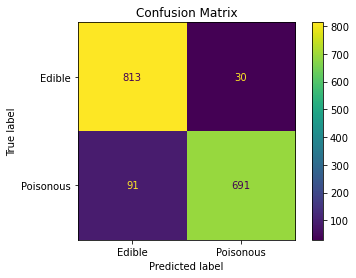

In [7]:
# Logistical Regression 

# Define the columns that need one-hot encoding
categorical_columns = ['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Define the pipeline with preprocessing and logistic regression classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])

# Split the data
X = simplified_df[['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']]
y = simplified_df['poisonous']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model using the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Plot confusion matrix
plot_confusion_matrix(pipeline, X_test, y_test, display_labels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.show()

The logistic regression model achieved an accuracy of approximately 92.55% on the test set, meaning the model correctly predicted if it is poisonous or edible for  92.55% of the mushrooms in the test set.

The classification report provides more detailed information about the performance of the model:

For the class **'edible' (e)** , the precision is 0.90, recall is 0.96, and the F1-score is 0.93.

For the class **'poisonous' (p)** , the precision is 0.96, recall is 0.88, and the F1-score is 0.92.

These metrics give insights into how well the model performs for each class. In this case, the model has high precision and recall for both classes, indicating good performance overall.

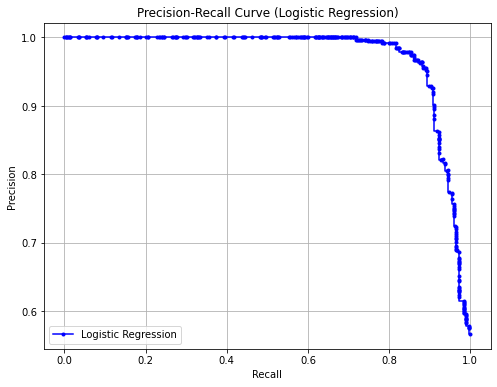

In [8]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get predicted probabilities from the logistic regression model
y_probas_logreg = pipeline.predict_proba(X_test)

# Compute precision and recall for logistic regression
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test_encoded, y_probas_logreg[:, 1])

# Create Precision-Recall display for logistic regression
pr_display_logreg = PrecisionRecallDisplay(precision=precision_logreg, recall=recall_logreg)

# Plot precision-recall curve for logistic regression
plt.figure(figsize=(8, 6))
pr_display_logreg.plot(ax=plt.gca(), marker='.', color='blue', label='Logistic Regression')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()


### Random Forest 

In [9]:
# Random Forest Model

# Define the columns that need one-hot encoding
categorical_columns = ['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Define the pipeline with preprocessing and the Random Forest classifier
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

# 1. Split the data
X = simplified_df[['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']]
y = simplified_df['poisonous']

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train and evaluate the Random Forest model using the pipeline
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 0.9452307692307692

Random Forest Classification Report:
               precision    recall  f1-score   support

           e       0.93      0.97      0.95       843
           p       0.97      0.92      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



The classification report provides more detailed information about the performance of the model:

For the class **'edible' (e)** , the precision is 0.93, recall is 0.97, and the F1-score is 0.95.

For the class **'poisonous' (p)** , the precision is 0.97, recall is 0.92, and the F1-score is 0.94.

These metrics give insights into how well the model performs for each class. In this case, the model has high precision and recall for both classes, indicating good performance overall.

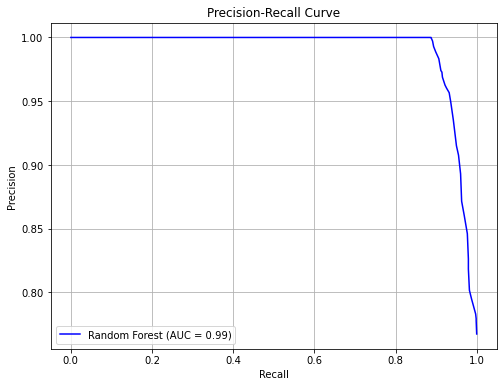

In [10]:
# Specify the positive label ('p' in your case)
pos_label = 'p'

# Get predicted probabilities for the positive class
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf, pos_label=pos_label)

# Compute area under the curve (AUC) for precision-recall
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Random Forest (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


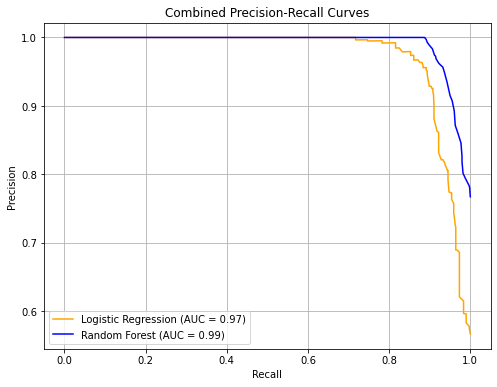

In [11]:

# Get predicted probabilities for the positive class from both models
y_prob_lr = pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Compute precision and recall for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_encoded, y_prob_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

# Compute precision and recall for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test_encoded, y_prob_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='orange', label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')
plt.plot(recall_rf, precision_rf, color='blue', label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Combined Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


The Random Forest model line extends out further than the logistic regression model line, which suggests that the random forest model achieves higher precision and recall simultaneously or that it maintains a better balance between them. This typically indicates a better-performing model for classification tasks, as it effectively captures more true positives while minimizing false positives and false negatives.

## Hyperparameter tuning
### Logistic Regression Tuning

In [14]:
# Define the parameter grid for logistic regression
param_grid = {
    'preprocessor__cat__drop': [None, 'first'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the performance of the best model on the test data
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("\nAccuracy on Test Set:", accuracy_test)
print("\nClassification Report on Test Set:\n", report_test)

Best Hyperparameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'preprocessor__cat__drop': None}

Accuracy on Test Set: 0.9255384615384615

Classification Report on Test Set:
               precision    recall  f1-score   support

           e       0.90      0.96      0.93       843
           p       0.96      0.88      0.92       782

    accuracy                           0.93      1625
   macro avg       0.93      0.92      0.93      1625
weighted avg       0.93      0.93      0.93      1625



**'classifier__C':** 10: This parameter (C) is specific to the Logistic Regression classifier. It represents the inverse of regularization strength. A higher value of C means less regularization, allowing the model to fit the training data more closely. In this case, the best value found was 10. **C=10 is relatively high, indicating weaker regularization. This suggests that the model prioritizes fitting the training data closely, potentially leading to higher variance (overfitting) if the training set is not representative of the underlying distribution of the data. **

**'classifier__penalty':** 'l2': This parameter (penalty) is also specific to Logistic Regression. It specifies the norm used in the penalization. **'l2' indicates the use of L2 regularization.** This is a common choice and generally works well for many datasets.

**'preprocessor__cat__drop'**: None: This parameter (drop) is specific to the preprocessor step of the pipeline. It indicates whether to drop the first category in each categorical feature to avoid multicollinearity issues when one-hot encoding categorical variables. **In this case, the best model did not drop any category (None).**

### Random Forest

In [13]:
# Define the columns that need one-hot encoding
categorical_columns = ['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Define the pipeline with preprocessing and the Random Forest classifier
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

# Load data (assuming you have a DataFrame named simplified_df)
# simplified_df = pd.read_csv("your_dataset.csv")

# 1. Split the data
X = simplified_df[['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']]
y = simplified_df['poisonous']

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Evaluate the performance of the best model on the test data
best_model_rf = grid_search_rf.best_estimator_
y_pred_test_rf = best_model_rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
report_test_rf = classification_report(y_test, y_pred_test_rf)

print("\nAccuracy on Test Set (Random Forest):", accuracy_test_rf)
print("\nClassification Report on Test Set (Random Forest):\n", report_test_rf)


Best Hyperparameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}

Accuracy on Test Set (Random Forest): 0.9464615384615385

Classification Report on Test Set (Random Forest):
               precision    recall  f1-score   support

           e       0.92      0.98      0.95       843
           p       0.97      0.91      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



**'classifier__max_depth'**: 20: This parameter (max_depth) determines the maximum depth of each decision tree in the random forest. Increasing max_depth allows the trees to grow deeper, potentially capturing more complex relationships in the data. However, deeper trees can also lead to overfitting. In this case, **the best value found was 20**, indicating relatively deep trees.

**'classifier__min_samples_leaf'**: 1: This parameter (min_samples_leaf) sets the minimum number of samples required to be at a leaf node. A higher value for min_samples_leaf can prevent overfitting by ensuring that each leaf node contains enough samples to make generalizable predictions. However, setting it too high may cause underfitting. In this case, **the best value found was 1**, indicating that each leaf node can contain only one sample.

**'classifier__min_samples_split'**: 2: This parameter (min_samples_split) sets the minimum number of samples required to split an internal node. Similar to min_samples_leaf, a higher value for min_samples_split can prevent overfitting by requiring more samples for a node to be split. In this case, **the best value found was 2**, meaning that a node can be split if it contains at least two samples.

**'classifier__n_estimators'**: 50: This parameter (n_estimators) specifies the number of decision trees in the random forest. Increasing n_estimators generally improves the performance of the model by reducing variance and providing more robust predictions. However, it also increases computational cost. In this case, **the best value found was 50**, indicating that the random forest consists of 50 decision trees.

## Results
When comparing the two models, both preformed well with high precision and recall for both. However, the random forest model performed slighty better with an overall accuracy of 94.5% while the logistical regression model had an overall accuracy of 92.6% 

This can be seen again in the the comparison precision-recall table, where we can see the precision remains higher for longer along the recall x axis, showing that there is higher precision and recall compared to that of the logistic regression model.

Through the fine tuning process we can see how the logistic regression model at its most accurate was at 92.8% so there is not much else we can do to improve it. 

## Discussion
Summarize what worked, what didn't etc.